# Install NuScenes Dataset for train_val

In [3]:
# Uncompress trainval
# !tar -xf /Volumes/volume/nuScenes/v1.0-trainval_meta.tgz -C /Volumes/volume/nuScenes/data  # Uncompress v1.0-trainval_meta.
# !tar -xf /Volumes/volume/nuScenes/v1.0-trainval01_blobs_camera.tgz -C /Volumes/volume/nuScenes/data1  # Uncompress v1.0-trainval01_blobs_camera
# !tar -xf /Volumes/volume/nuScenes/v1.0-trainval01_blobs_radar.tgz -C /Volumes/volume/nuScenes/data2  # Uncompress v1.0-trainval01_blobs_radar
# !tar -xf /Volumes/volume/nuScenes/v1.0-trainval01_keyframes.tgz -C /Volumes/volume/nuScenes/data3  # Uncompress v1.0-trainval01_keyframes
# !tar -xf /Volumes/volume/nuScenes/v1.0-trainval01_blobs_lidar.tgz -C /Volumes/volume/nuScenes/data/ # Uncompress v1.0-trainval01_lidar

# Install nuScenes Dataset for test

In [8]:
# Uncompress test
# !tar -xf /Volumes/volume/nuScenes/v1.0-test_blobs_camera.tgz -C /Volumes/volume/nuScenes/test  # Uncompress v1.0-test_blobs_camera
# !tar -xf /Volumes/volume/nuScenes/v1.0-test_blobs_radar.tgz -C /Volumes/volume/nuScenes/test  # Uncompress v1.0-test_blobs_radar
# !tar -xf /Volumes/volume/nuScenes/v1.0-test_meta.tgz -C /Volumes/volume/nuScenes/test # Uncompress v1.0-test_meta

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from nuimages import NuImages
from nuscenes.nuscenes import NuScenes

# nuim = NuImages(dataroot='/Volumes/volume/nuScenes/trainval/', version='v1.0-trainval', verbose=True, lazy=True)
nusc = NuScenes(version='v1.0-trainval', dataroot='/Volumes/volume/nuScenes/train_val/', verbose=True)


Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 96.221 seconds.
Reverse indexing ...
Done reverse indexing in 16.6 seconds.


In [2]:
nusc.list_scenes()

scene-0161, Car overtaking, parking lot, peds, ped ... [18-05-21 15:07:23]   19s, boston-seaport, #anns:1970
scene-0162, Leaving parking lot, parked cars, hidde... [18-05-21 15:07:43]   19s, boston-seaport, #anns:2230
scene-0163, Drive along street with dozens of parke... [18-05-21 15:08:03]   19s, boston-seaport, #anns:1585
scene-0164, Turn into narrow street, parked cars, p... [18-05-21 15:08:38]   19s, boston-seaport, #anns:745
scene-0165, Pass crane, truck and construction work... [18-05-21 15:09:15]   19s, boston-seaport, #anns:1423
scene-0166, Leaving narrow street, many cars [18-05-21 15:09:35]   19s, boston-seaport, #anns:1313
scene-0167, Pass parked trucks, sitting pedestrians... [18-05-21 15:10:13]   19s, boston-seaport, #anns:1455
scene-0168, Parking lot, peds, parked cars, parked ... [18-05-21 15:10:52]   19s, boston-seaport, #anns:1751
scene-0170, Turn left, truck parked in the middle o... [18-05-21 15:13:37]   19s, boston-seaport, #anns:1430
scene-0171, Densely parked tru

In [3]:
#Let's look at a scene metadata
my_scene = nusc.scene[0]
my_scene



{'token': '73030fb67d3c46cfb5e590168088ae39',
 'log_token': '6b6513e6c8384cec88775cae30b78c0e',
 'nbr_samples': 40,
 'first_sample_token': 'e93e98b63d3b40209056d129dc53ceee',
 'last_sample_token': '40e413c922184255a94f08d3c10037e0',
 'name': 'scene-0001',
 'description': 'Construction, maneuver between several trucks'}

In [4]:
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)
my_sample


{'token': 'e93e98b63d3b40209056d129dc53ceee',
 'timestamp': 1531883530449377,
 'prev': '',
 'next': '14d5adfe50bb4445bc3aa5fe607691a8',
 'scene_token': '73030fb67d3c46cfb5e590168088ae39',
 'data': {'RADAR_FRONT': 'bddd80ae33ec4e32b27fdb3c1160a30e',
  'RADAR_FRONT_LEFT': '1a08aec0958e42ebb37d26612a2cfc57',
  'RADAR_FRONT_RIGHT': '282fa8d7a3f34b68b56fb1e22e697668',
  'RADAR_BACK_LEFT': '05fc4678025246f3adf8e9b8a0a0b13b',
  'RADAR_BACK_RIGHT': '31b8099fb1c44c6381c3c71b335750bb',
  'LIDAR_TOP': '3388933b59444c5db71fade0bbfef470',
  'CAM_FRONT': '020d7b4f858147558106c504f7f31bef',
  'CAM_FRONT_RIGHT': '16d39ff22a8545b0a4ee3236a0fe1c20',
  'CAM_BACK_RIGHT': 'ec7096278e484c9ebe6894a2ad5682e9',
  'CAM_BACK': 'aab35aeccbda42de82b2ff5c278a0d48',
  'CAM_BACK_LEFT': '86e6806d626b4711a6d0f5015b090116',
  'CAM_FRONT_LEFT': '24332e9c554a406f880430f17771b608'},
 'anns': ['173a50411564442ab195e132472fde71',
  '5123ed5e450948ac8dc381772f2ae29a',
  'acce0b7220754600b700257a1de1573d',
  '8d7cb5e96cae48c39

In [5]:
nusc.list_sample(my_sample['token'])

Sample: e93e98b63d3b40209056d129dc53ceee

sample_data_token: bddd80ae33ec4e32b27fdb3c1160a30e, mod: radar, channel: RADAR_FRONT
sample_data_token: 1a08aec0958e42ebb37d26612a2cfc57, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 282fa8d7a3f34b68b56fb1e22e697668, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: 05fc4678025246f3adf8e9b8a0a0b13b, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 31b8099fb1c44c6381c3c71b335750bb, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: 3388933b59444c5db71fade0bbfef470, mod: lidar, channel: LIDAR_TOP
sample_data_token: 020d7b4f858147558106c504f7f31bef, mod: camera, channel: CAM_FRONT
sample_data_token: 16d39ff22a8545b0a4ee3236a0fe1c20, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: ec7096278e484c9ebe6894a2ad5682e9, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: aab35aeccbda42de82b2ff5c278a0d48, mod: camera, channel: CAM_BACK
sample_data_token: 86e6806d626b4711a6d0f5015b090116, mod: camera, channel:

In [6]:
my_sample['data']

{'RADAR_FRONT': 'bddd80ae33ec4e32b27fdb3c1160a30e',
 'RADAR_FRONT_LEFT': '1a08aec0958e42ebb37d26612a2cfc57',
 'RADAR_FRONT_RIGHT': '282fa8d7a3f34b68b56fb1e22e697668',
 'RADAR_BACK_LEFT': '05fc4678025246f3adf8e9b8a0a0b13b',
 'RADAR_BACK_RIGHT': '31b8099fb1c44c6381c3c71b335750bb',
 'LIDAR_TOP': '3388933b59444c5db71fade0bbfef470',
 'CAM_FRONT': '020d7b4f858147558106c504f7f31bef',
 'CAM_FRONT_RIGHT': '16d39ff22a8545b0a4ee3236a0fe1c20',
 'CAM_BACK_RIGHT': 'ec7096278e484c9ebe6894a2ad5682e9',
 'CAM_BACK': 'aab35aeccbda42de82b2ff5c278a0d48',
 'CAM_BACK_LEFT': '86e6806d626b4711a6d0f5015b090116',
 'CAM_FRONT_LEFT': '24332e9c554a406f880430f17771b608'}

In [7]:
sensor = 'CAM_FRONT_RIGHT'
cam_front_right_data = nusc.get('sample_data',my_sample['data'][sensor])
cam_front_right_data

sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

{'token': '020d7b4f858147558106c504f7f31bef',
 'sample_token': 'e93e98b63d3b40209056d129dc53ceee',
 'ego_pose_token': '020d7b4f858147558106c504f7f31bef',
 'calibrated_sensor_token': '2e64b091b3b146a390c2606b9081343c',
 'timestamp': 1531883530412470,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-18-11-07-57+0800__CAM_FRONT__1531883530412470.jpg',
 'prev': '',
 'next': 'caa2bfad0b8a4a8090cb0b803352cbc8',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

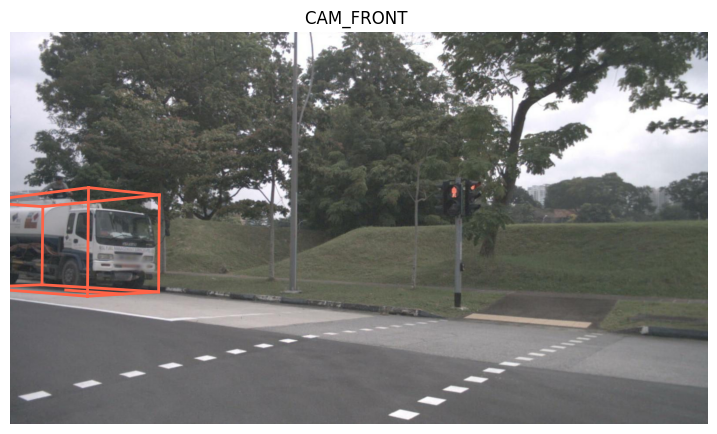

In [8]:
nusc.render_sample_data(cam_front_data['token'])
# nusc.render_sample_data(cam_front_right_data['token'])
# nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['CAM_FRONT_LEFT'])['token'])
# nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['CAM_BACK_RIGHT'])['token'])
# nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['CAM_BACK_LEFT'])['token'])
# nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['CAM_BACK'])['token'])
# nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['RADAR_FRONT'])['token'])
# nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['RADAR_FRONT_LEFT'])['token'])
# nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['RADAR_FRONT_RIGHT'])['token'])
# nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['RADAR_BACK_LEFT'])['token'])
# nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['RADAR_BACK_RIGHT'])['token'])

In [9]:
my_annotation_token = my_sample['anns'][2]
my_annotation_metadata =  nusc.get('sample_annotation', my_annotation_token)
my_annotation_metadata

{'token': 'acce0b7220754600b700257a1de1573d',
 'sample_token': 'e93e98b63d3b40209056d129dc53ceee',
 'instance_token': '39b6c31c9925492a8a9f1b0ef3b877b6',
 'visibility_token': '4',
 'attribute_tokens': ['58aa28b1c2a54dc88e169808c07331e3'],
 'translation': [1002.464, 632.267, 1.936],
 'size': [2.312, 7.516, 3.093],
 'rotation': [0.9343569321017062, 0.0, 0.0, -0.35633849558178193],
 'prev': '',
 'next': '4b1c1acb00c04dfe84e54f64a8381649',
 'num_lidar_pts': 171,
 'num_radar_pts': 7,
 'category_name': 'vehicle.truck'}

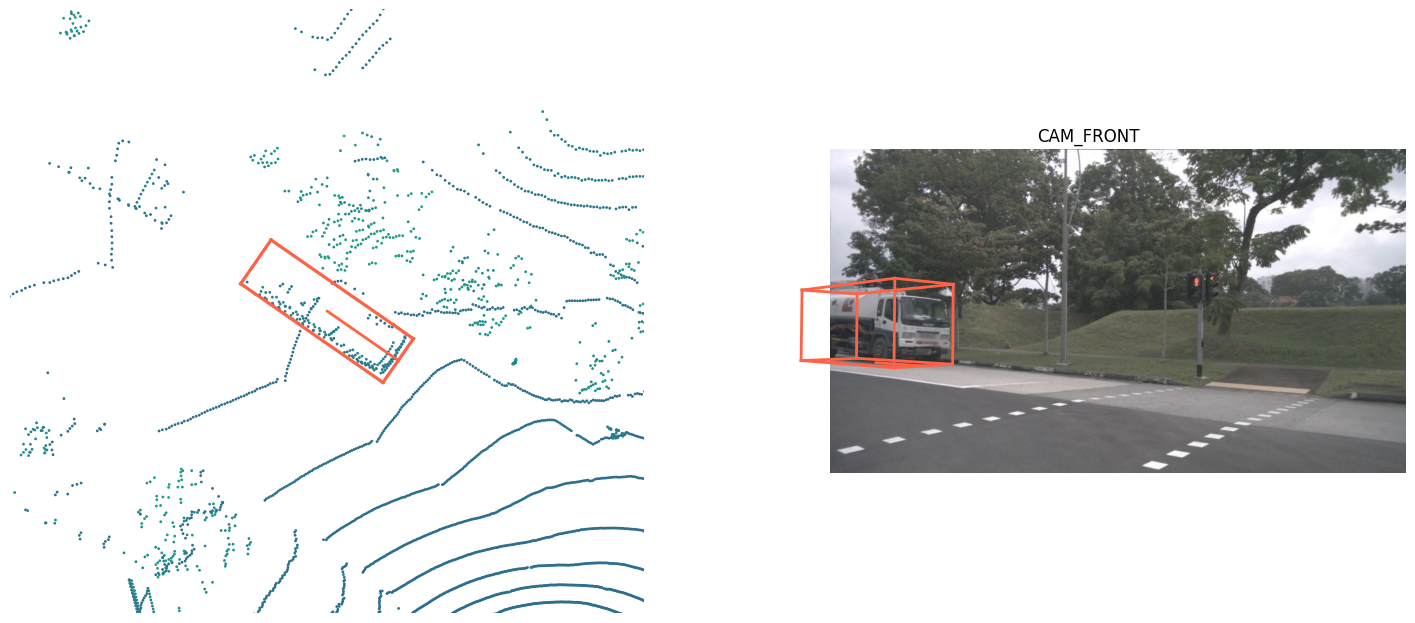

In [10]:
nusc.render_annotation(my_annotation_token)